In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [ ]:
# Load the dataset
df = pd.read_csv('/content/Cardiotocographic.csv')


In [ ]:
# Display the first few rows to understand its structure
print(df.head())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [ ]:
print(df.tail())

         LB        AC        FM        UC   DL   DS   DP  ASTV  MSTV  \
2121  140.0  0.000000  0.961268  0.007426  0.0  0.0  0.0  79.0   0.2   
2122  140.0  0.000775  0.000000  0.006979  0.0  0.0  0.0  78.0   0.4   
2123  140.0  0.000980  0.000000  0.006863  0.0  0.0  0.0  79.0   0.4   
2124  140.0  0.000679  0.000000  0.006110  0.0  0.0  0.0  78.0   0.4   
2125  142.0  0.001616 -0.000188  0.008078  0.0  0.0  0.0  74.0   0.4   

           ALTV  MLTV  Width  Tendency       NSP  
2121  25.000000   7.2   40.0       0.0  2.000000  
2122  22.000000   7.1   66.0       1.0  2.000000  
2123  20.000000   6.1   67.0       1.0  1.990464  
2124  27.000000   7.0   66.0       1.0  2.000000  
2125  35.857183   5.0   42.0       0.0  1.000000  


In [ ]:
# Check for missing values
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [ ]:
# Handle missing values (example: fill with mean or median)
df.fillna(df.mean(), inplace=True)  # Imputation with mean

# Alternatively, drop rows with missing values
# df.dropna(inplace=True)
print(df.isnull().sum())

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [ ]:
# Check data types
print(df.dtypes)

# Convert data types if necessary
# Example: Convert columns to numeric if they are stored as strings
df['LB'] = pd.to_numeric(df['LB'], errors='coerce')
df['AC'] = pd.to_numeric(df['AC'], errors='coerce')



LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [ ]:
# Example: Z-score method to detect outliers

df_z = df.apply(zscore)
outliers = (np.abs(df_z) > 3).sum()
print("Number of outliers per column:")
print(outliers)


Number of outliers per column:
LB          10
AC          18
FM          39
UC          11
DL          33
DS          16
DP          39
ASTV        10
MSTV        26
ALTV        38
MLTV        17
Width       10
Tendency    10
NSP         10
dtype: int64


In [ ]:
print(df.describe())

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

In [ ]:
# Statistical summary of the dataset
print(df.describe())

# Additional summary statistics
median_values = df.median()
print("Median values:")
print(median_values)

iqr = df.quantile(0.75) - df.quantile(0.25)
print("Interquartile Range (IQR):")
print(iqr)

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

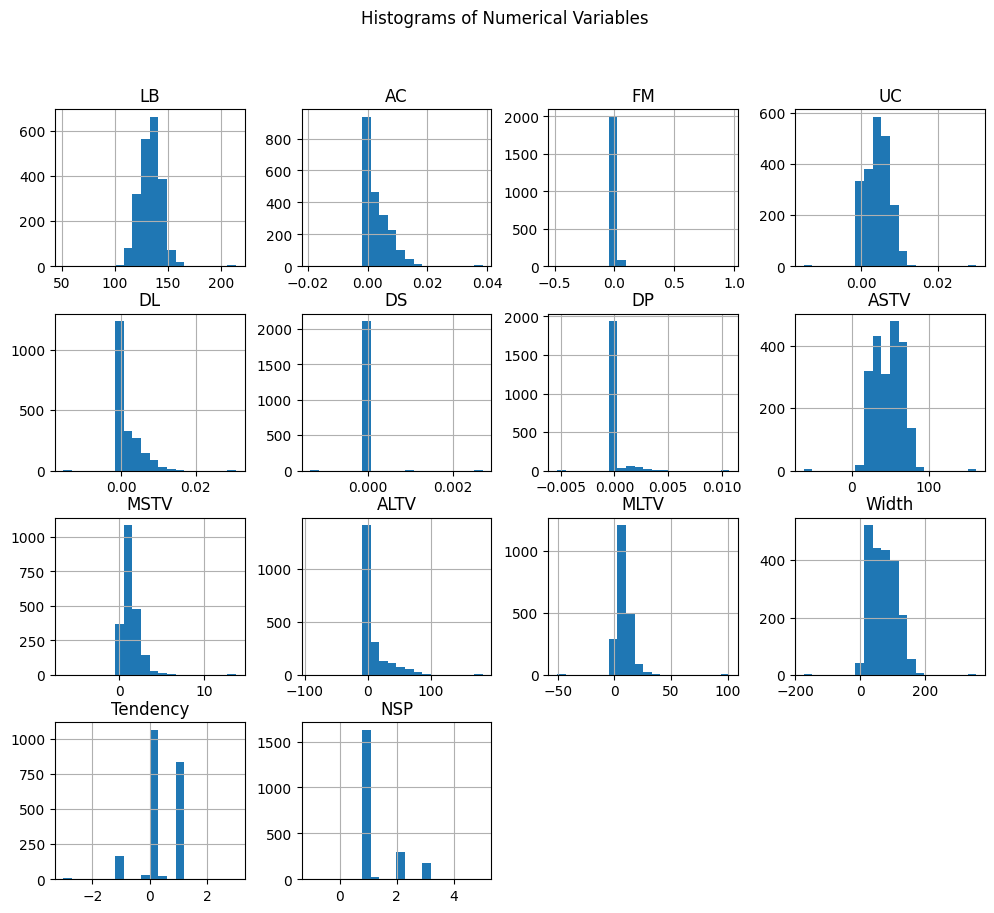

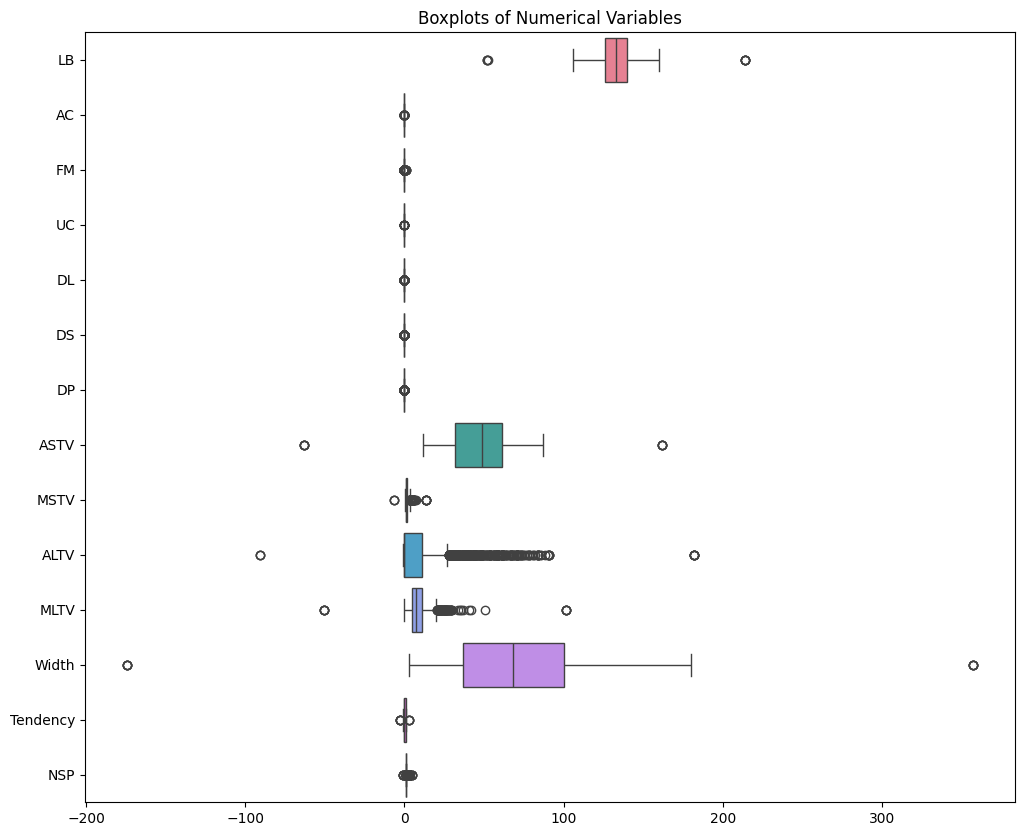

In [ ]:
# Histograms for numerical variables
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Boxplots for numerical variables
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, orient='h')
plt.title('Boxplots of Numerical Variables')
plt.show()

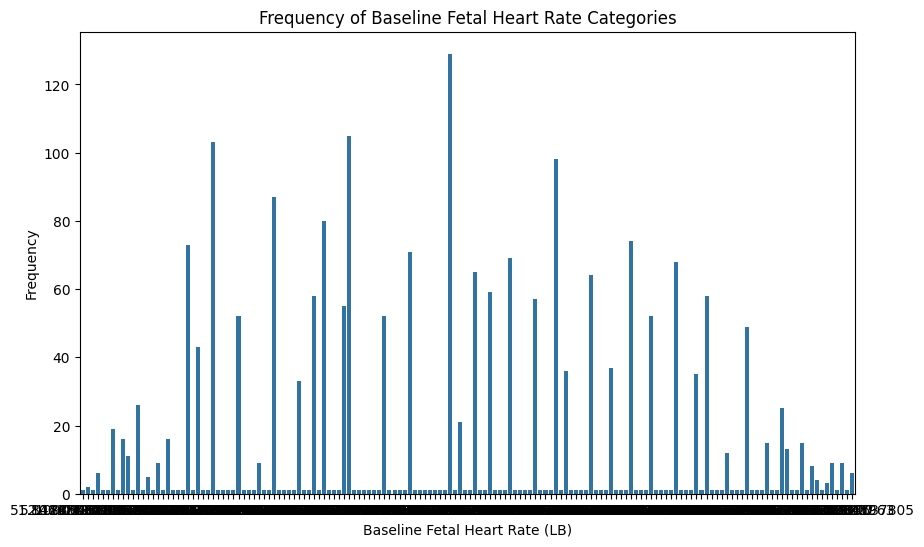

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LB',data=df) # Assuming df is your DataFrame
plt.title('Frequency of Baseline Fetal Heart Rate Categories')
plt.xlabel('Baseline Fetal Heart Rate (LB)')
plt.ylabel('Frequency')
plt.show()


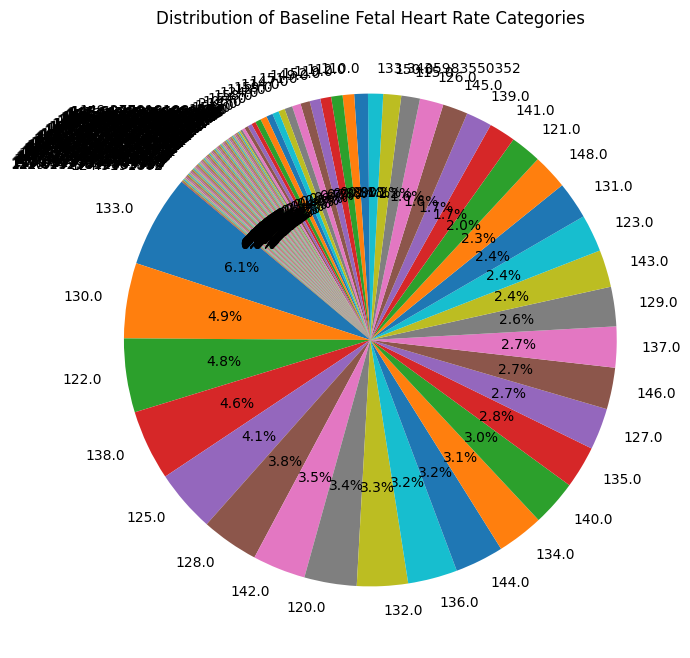

In [ ]:
lb_counts = df['LB'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(lb_counts, labels=lb_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Baseline Fetal Heart Rate Categories')
plt.show()


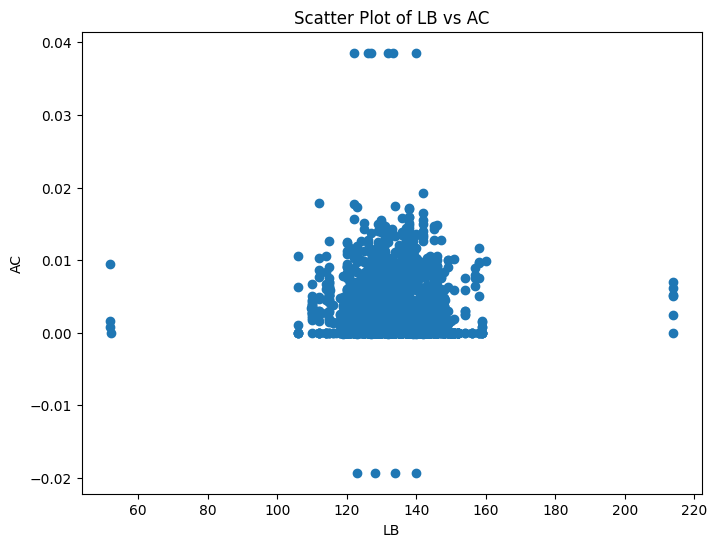

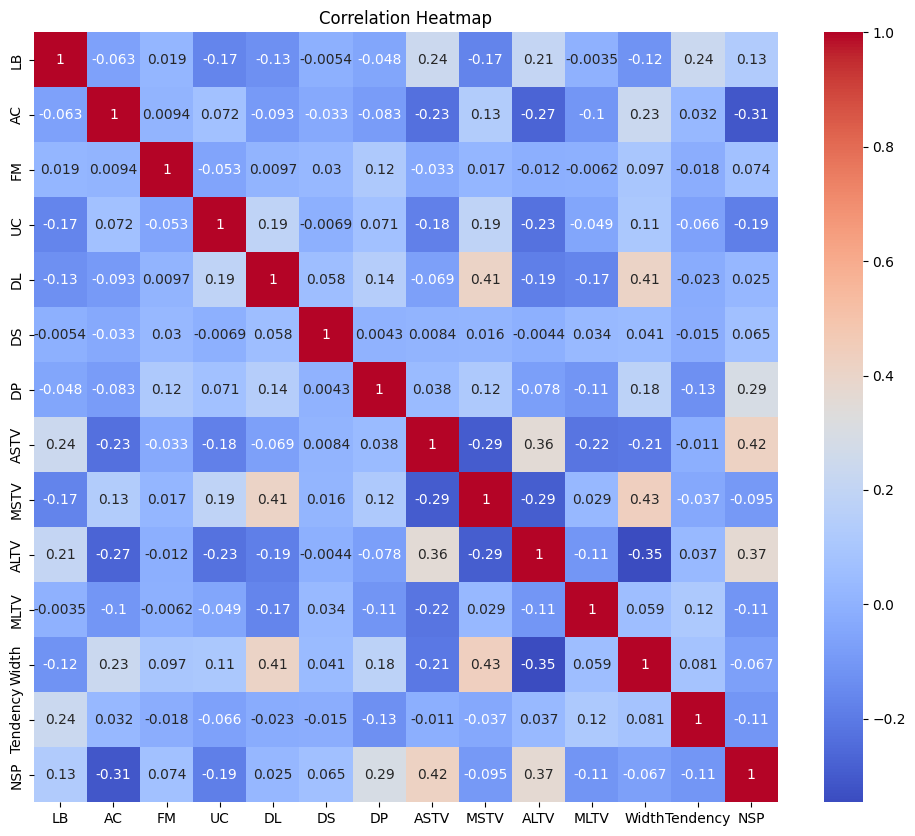

In [ ]:
# Scatter plot example between 'LB' and 'AC'
plt.figure(figsize=(8, 6))
plt.scatter(df['LB'], df['AC'])
plt.title('Scatter Plot of LB vs AC')
plt.xlabel('LB')
plt.ylabel('AC')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


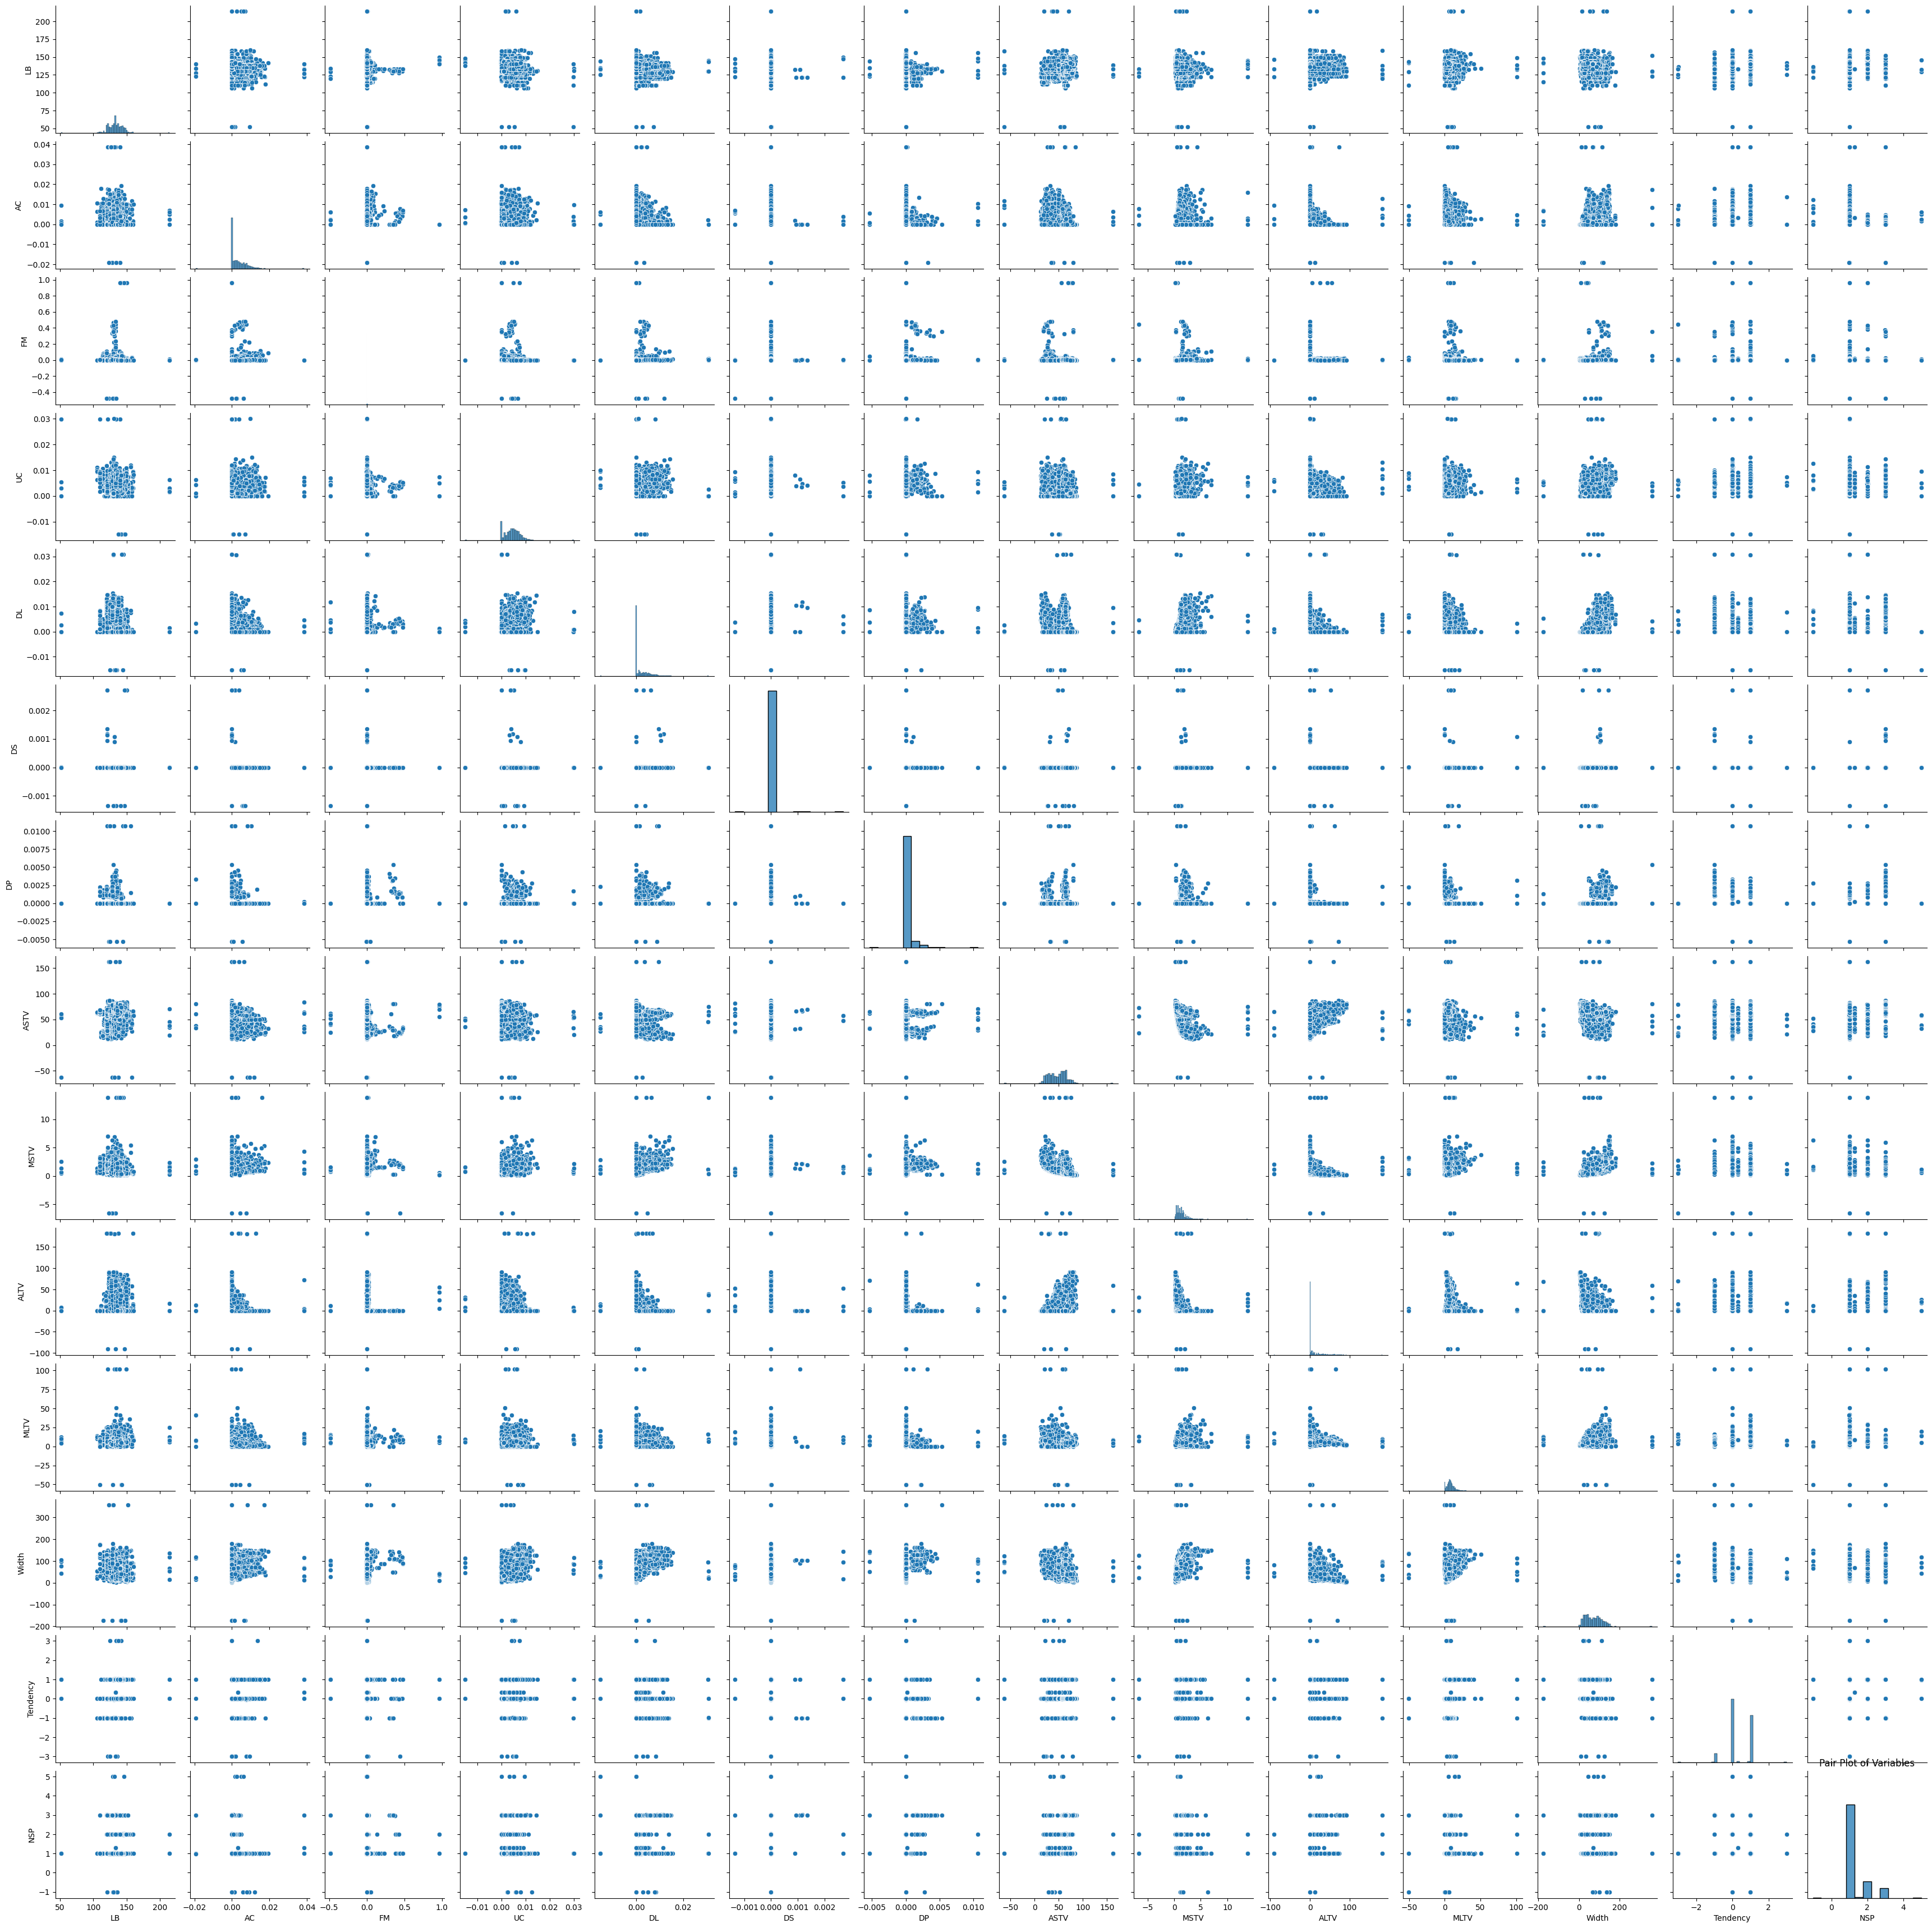

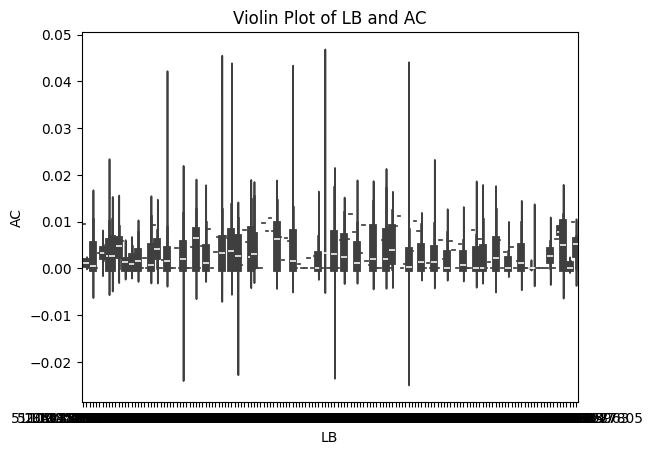

In [ ]:
#Advanced Visualization
# Pair plot
sns.pairplot(df)
plt.title('Pair Plot of Variables')
plt.show()

# Violin plot example for 'LB' and 'AC'
sns.violinplot(x='LB', y='AC', data=df)
plt.title('Violin Plot of LB and AC')
plt.show()


In [ ]:
#Pattern Recognition and Insights
# Correlation analysis
correlation = df.corr()
print("Correlation matrix:")
print(correlation)

# Insight examples
# Explore trends or patterns if temporal data is available
# Example: Check if any variables show a time-based trend
# df['Time'].plot()  # if there's a 'Time' column
# plt.title('Trend Over Time')
# plt.show()


Correlation matrix:
                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.062839  0.018776 -0.166201 -0.126536 -0.005438   
AC       -0.062839  1.000000  0.009432  0.071863 -0.093196 -0.033101   
FM        0.018776  0.009432  1.000000 -0.053226  0.009718  0.029899   
UC       -0.166201  0.071863 -0.053226  1.000000  0.190128 -0.006922   
DL       -0.126536 -0.093196  0.009718  0.190128  1.000000  0.058430   
DS       -0.005438 -0.033101  0.029899 -0.006922  0.058430  1.000000   
DP       -0.047724 -0.083277  0.121274  0.070501  0.144940  0.004285   
ASTV      0.241857 -0.230439 -0.032691 -0.181161 -0.069361  0.008425   
MSTV     -0.169561  0.133649  0.017055  0.189406  0.410102  0.016077   
ALTV      0.210446 -0.271041 -0.011936 -0.227304 -0.186967 -0.004392   
MLTV     -0.003457 -0.104875 -0.006237 -0.049351 -0.165198  0.034349   
Width    -0.118425  0.234735  0.097204  0.107159  0.408664  0.040832   
Tendency  0.236864  0.031977 -0.018338 -0.06

In [ ]:
#Key Tasks:
#Data Cleaning and Preparation: The dataset is first loaded and checked for missing values, data type inconsistencies, and outliers. Proper handling of these issues ensures the data is ready for analysis.

#Statistical Summary: Statistical measures such as mean, median, standard deviation, and interquartile range are calculated for each variable. These summaries provide insights into the central tendencies and dispersions within the data.

#Data Visualization: Visual tools like histograms, boxplots, bar charts, and pie charts are employed to represent data distribution and frequency. Correlation heatmaps and scatter plots are used to explore relationships between variables.

#Pattern Recognition and Insights: Correlations and trends within the dataset are identified, offering deeper understanding and potential implications for further analysis.

#Conclusion: The assignment concludes by summarizing the insights gained and discussing how these findings can guide decision-making or further studies.